In [1]:
import numpy as np
import pandas as pd

In [2]:
PATH = "F:/UB/5. Independent Study/archive/ratings.csv"

In [3]:
ratings_df = pd.read_csv(PATH)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [4]:
ratings_df.drop(columns=['timestamp'], inplace=True)
filtered_ratings_df = ratings_df[ratings_df['rating'] > 2.5]
filtered_ratings_df = ratings_df[ratings_df['userId'] < 500]
filtered_ratings_df = filtered_ratings_df.groupby('userId').head(5)
filtered_ratings_df['movieId'] = filtered_ratings_df['movieId'].astype(str)
filtered_ratings_df.sample(10)

,userId,movieId,rating
25313,312,19,1.0
24617,297,170,1.5
16965,222,318,3.5
15152,189,802,2.0
26230,321,2,2.0
45510,478,48,1.0
25518,313,47,4.0
14853,181,2,3.0
7427,74,2,4.0
33699,381,2421,4.0


In [5]:
modified_ratings_df = filtered_ratings_df.groupby('userId').agg(list).reset_index()
modified_ratings_df.columns = ['user_id', 'movie_id', 'ratings']
modified_ratings_df = modified_ratings_df[modified_ratings_df['movie_id'].apply(lambda x: len(x) >= 5)]

modified_ratings_df.head()

,user_id,movie_id,ratings
0,1,"[110, 147, 858, 1221, 1246]","[1.0, 4.5, 5.0, 5.0, 5.0]"
1,2,"[5, 25, 32, 58, 64]","[3.0, 3.0, 2.0, 3.0, 4.0]"
2,3,"[480, 500, 527, 858, 1092]","[3.0, 2.0, 4.0, 4.0, 3.0]"
3,4,"[223, 415, 648, 1097, 1197]","[4.0, 4.0, 4.0, 5.0, 4.0]"
4,5,"[7, 157, 296, 541, 750]","[3.0, 2.0, 4.0, 5.0, 5.0]"


In [6]:
PATH_movies = "F:/UB/5. Independent Study/archive/movies_metadata.csv"
movies_df = pd.read_csv(PATH_movies)
movies_df.head()

C:\Users\nayak\AppData\Local\Temp\ipykernel_22620\1943516506.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(PATH_movies)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
movies_df = movies_df.drop_duplicates(subset='id')
movies_df = movies_df.iloc[:, [5, 20]]
movies_df.head()

,id,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [8]:
dictionary_id_to_movie = {}
for i, row in movies_df.iterrows():
    dictionary_id_to_movie[row['id']] = row['title']

In [9]:
len(dictionary_id_to_movie)

45436

In [10]:
def map_id_to_name(ids):
    return [dictionary_id_to_movie[id] for id in ids if id in dictionary_id_to_movie]
modified_ratings_df['movie_names'] = modified_ratings_df['movie_id'].apply(map_id_to_name)

In [11]:
modified_ratings_df.head()

,user_id,movie_id,ratings,movie_names
0,1,"[110, 147, 858, 1221, 1246]","[1.0, 4.5, 5.0, 5.0, 5.0]","[Three Colors: Red, The 400 Blows, Sleepless i..."
1,2,"[5, 25, 32, 58, 64]","[3.0, 3.0, 2.0, 3.0, 4.0]","[Four Rooms, Jarhead, Pirates of the Caribbean..."
2,3,"[480, 500, 527, 858, 1092]","[3.0, 2.0, 4.0, 4.0, 3.0]","[Monsoon Wedding, Reservoir Dogs, Once Were Wa..."
3,4,"[223, 415, 648, 1097, 1197]","[4.0, 4.0, 4.0, 5.0, 4.0]","[Rebecca, Batman & Robin, Beauty and the Beast]"
4,5,"[7, 157, 296, 541, 750]","[3.0, 2.0, 4.0, 5.0, 5.0]","[Star Trek III: The Search for Spock, Terminat..."


In [12]:
modified_ratings_df.drop(['movie_id', 'ratings'], axis=1, inplace=True)

In [13]:
modified_ratings_df.head()

,user_id,movie_names
0,1,"[Three Colors: Red, The 400 Blows, Sleepless i..."
1,2,"[Four Rooms, Jarhead, Pirates of the Caribbean..."
2,3,"[Monsoon Wedding, Reservoir Dogs, Once Were Wa..."
3,4,"[Rebecca, Batman & Robin, Beauty and the Beast]"
4,5,"[Star Trek III: The Search for Spock, Terminat..."


In [14]:
modified_ratings_df.to_csv('F:/Test_Environment/RECSYS-GEmbeddings/recommendatons_user_based.csv')

In [15]:
import networkx as nx 
G = nx.Graph()
for index, row in modified_ratings_df[:5].iterrows():
    user_id = row['user_id']
    recommendations = row['movie_names']
    
    # Add movie title as node
    G.add_node(user_id)
    
    # Add recommendation titles as nodes
    for recommendation in recommendations:
        G.add_node(recommendation)
        
        # Add edges connecting movie title to its recommendations
        G.add_edge(user_id, recommendation, connection='u2m')

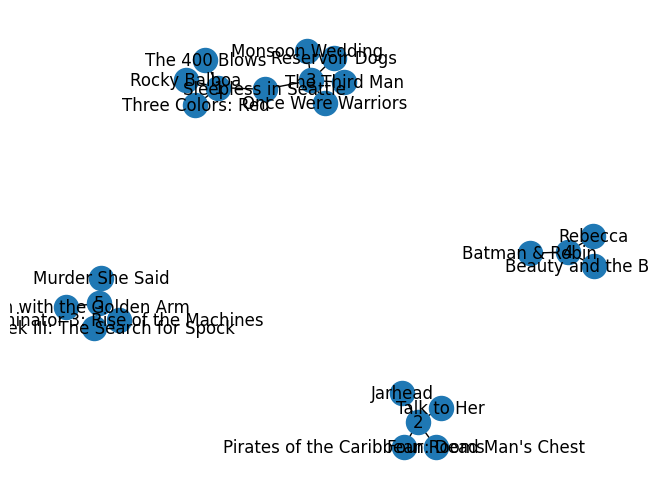

In [16]:
nx.draw(G, with_labels=True)

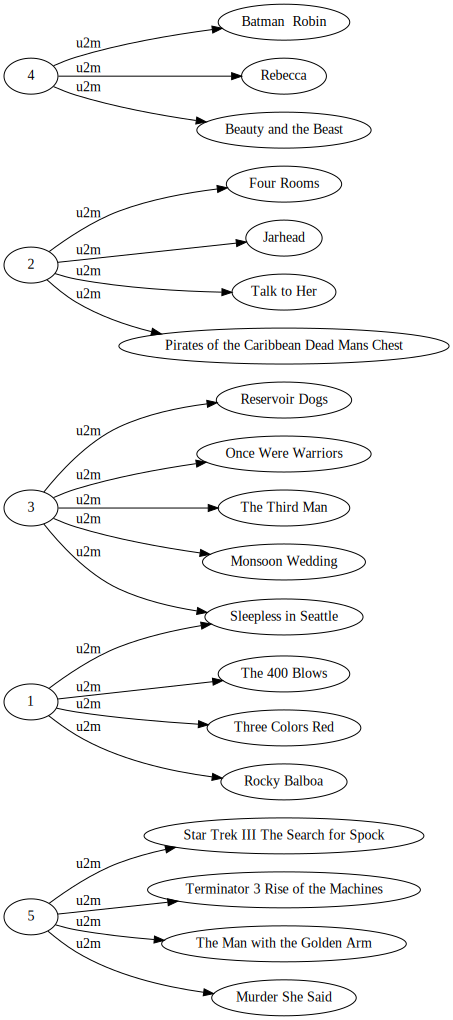

In [17]:
from graphviz import Digraph
import re

def draw_knowledge_graph(df):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) 

    # Define nodes and edges based on the DataFrame
    nodes = set(df['user_id'].astype(str))  # Convert user_id to string
    edges = set()
    for index, row in df.iterrows():
        user_id = str(row['user_id'])  # Convert user_id to string
        recommendations = row['movie_names']
        for recommendation in recommendations:
            cleaned_label = re.sub(r'[^\w\s]', '', recommendation)  # Remove non-alphanumeric characters
            edges.add((user_id, cleaned_label))

    # Add nodes to the graph
    for node in nodes:
        dot.node(name=node, label=node, shape='oval')

    # Add edges to the graph
    for edge in edges:
        dot.edge(edge[0], edge[1], label='u2m')

    return dot

draw_knowledge_graph(modified_ratings_df[:5])

In [18]:
graph = draw_knowledge_graph(modified_ratings_df[:5])
output_path = 'F:/Test_Environment/RECSYS-GEmbeddings/knowledge_graph_user_5'
graph.render(output_path, format='png', cleanup=True)

'F:\\Test_Environment\\RECSYS-GEmbeddings\\knowledge_graph_user_5.png'